Interprétabilité locale sur des images

In [91]:
# Import des librairies
# Base
%matplotlib inline
import numpy as np # type: ignore
import pandas as pd # type: ignore
import time,os
import cv2# type: ignore
# Data Viz
import matplotlib.pyplot as plt# type: ignore
# Modèle
import tensorflow as tf# type: ignore
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,MaxPool2D# type: ignore
from keras import layers, models, optimizers, losses, metrics,callbacks,utils,Model,Sequential,Input# type: ignore
print("tensorflow version",tf.__version__)

tensorflow version 2.16.1


In [92]:
from tensorflow.keras.applications import VGG19
logged_model = r'\\wsl.localhost\Ubuntu\home\adrien\MLflow\mlruns\902956440979823799\e353de44e64042d3b9da44c9f1768402\artifacts\model'
base_model = VGG19(include_top=False,
                weights=None,
    #input_tensor=None,
    input_shape=(256,256,3),
    #pooling=None,
    #classifier_activation="softmax")
    )
# Load model as a PyFuncModel.
#loaded_cnn = mlflow.pyfunc.load_model(logged_model)

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(2048, activation='relu')(x)
x= layers.Dropout(rate=0.2)(x)
x = layers.Dense(1024, activation='relu')(x)
x= layers.Dropout(rate=0.2)(x)
output = layers.Dense(38, activation='softmax')(x)
cnn = models.Model(inputs=[base_model.input], outputs=[output])
 
cnn.compile(optimizer=optimizers.Adam(learning_rate=1e-8),loss='categorical_crossentropy',metrics=['accuracy'])
cnn.load_weights(logged_model+"/data/model.keras")   
cnn.summary()

d:\Adrien et Sarah\Documents\GitHub\JAN24_PLANT_RECOGNITION\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)     │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2048)           │     1,050,624 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 23,212,134 (88.55 MB)

 Trainable params: 23,212,134 (88.55 MB)

 Non-trainable params: 0 (0.00 B)

In [93]:
def my_preprocessing_func(img):
    image = np.array(img)
    return image / 255

shape (256, 256, 3)
reshape (1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
2


(-0.5, 255.5, 255.5, -0.5)

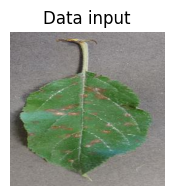

In [94]:
im=cv2.cvtColor(cv2.imread(r"..\src\features\test/AppleCedarRust2.jpg"),cv2.COLOR_BGR2RGB)
im=cv2.resize(im,(256,256))
im=my_preprocessing_func(im)
print("shape",im.shape)
d=im.reshape(1,256,256,3)
print("reshape",d.shape)
plt.figure(figsize=(5,2))
plt.imshow(d[0]);
plt.title("Data input")
pred=cnn.predict(d)
predicted_class_indices=np.argmax(pred,axis=1)
print(predicted_class_indices[0])
plt.axis('off')


Nous obtenons la sortie de la dernière couche de convolution. Nous créons ensuite un modèle qui remonte uniquement à cette couche.

In [95]:
last_conv_layer = cnn.get_layer("block5_conv4")
last_conv_layer_model = Model(cnn.inputs, last_conv_layer.output)

Nous créons un modèle qui prend ensuite la sortie du modèle ci-dessus et utilise les couches restantes pour obtenir les prédictions finales.

In [96]:
classifier_input = Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
layer_names = []
for layer in cnn.layers[21:]:
    layer_names.append(layer.name) # Noms des couches, afin que vous puissiez les intégrer à votre graphique
print(layer_names)
for layer_name in layer_names:
    x = cnn.get_layer(layer_name)(x)
classifier_model = Model(classifier_input, x)

['block5_pool', 'global_average_pooling2d_1', 'dense_3', 'dropout_2', 'dense_4', 'dropout_3', 'dense_5']


Tout d’abord, nous obtenons la sortie du modèle jusqu’à la dernière couche de convolution. Nous demandons à tf de surveiller cette sortie tensorielle, car nous voulons calculer les gradients des prédictions de notre classe cible par rapport à la sortie de ce modèle (dernier modèle de couche de convolution).

In [97]:
with tf.GradientTape() as tape:
    inputs = d
    last_conv_layer_output = last_conv_layer_model(inputs)
    tape.watch(last_conv_layer_output)
    preds = classifier_model(last_conv_layer_output)
    top_pred_index = tf.argmax(preds[0])
    top_class_channel = preds[:, top_pred_index]

In [98]:
grads = tape.gradient(top_class_channel, last_conv_layer_output)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

In [99]:
last_conv_layer_output = last_conv_layer_output.numpy()[0]
pooled_grads = pooled_grads.numpy()
for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:, :, i] *= pooled_grads[i]

The next step is to multiply the gradients (corresponding to the importance of the given feature map / filter) with the actual feature map (filter) it represents.

In [100]:
# Average over all the filters to get a single 2D array
gradcam = np.mean(last_conv_layer_output, axis=-1)
# Clip the values (equivalent to applying ReLU)
# and then normalise the values
gradcam = np.clip(gradcam, 0, np.max(gradcam)) / np.max(gradcam)
gradcam = cv2.resize(gradcam, (256, 256))

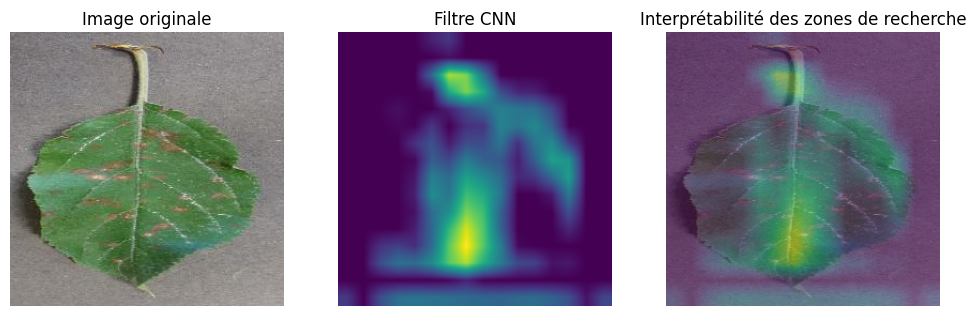

In [101]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(d[0])
plt.title("Image originale")
plt.axis('off')

plt.subplot(132)
plt.imshow(gradcam)
plt.title("Filtre CNN")
plt.axis('off')

plt.subplot(133)
plt.imshow(d[0])
plt.imshow(gradcam, alpha=0.5)
plt.title('Interprétabilité des zones de recherche')
plt.axis('off')


plt.show()
